In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('C:/Users/hp/Downloads/Dataset.csv')

In [4]:
df.head()

,Unnamed: 0,x_1,x_109,x_113,x_12,x_124,x_127,x_144,x_16,x_18,...,x_73,x_77,x_78,x_8,x_80,x_83,x_89,x_91,x_99,y
0,0,5099,1,5,156,35,-2,1,40,999,...,0.11,629,14,487,-0.31,115,0.02,-0.10,-0.49,0
1,1,5191,0,1,164,16,1,5,4,999,...,0.11,509,26,346,-0.31,317,0.02,0.24,-0.21,0
2,2,5228,1,0,774,75,1,5,12,999,...,0.11,1058,30,227,-0.31,464,0.02,-0.10,-0.21,0
3,3,5228,1,1,747,4,1,5,69,999,...,0.11,1048,4,17,-0.31,39,-0.18,-0.10,-0.21,0
4,4,5196,1,5,29,28,0,4,32,999,...,0.11,993,22,58,-0.31,492,0.02,-0.10,0.21,0


In [5]:
df.columns

Index(['Unnamed: 0', 'x_1', 'x_109', 'x_113', 'x_12', 'x_124', 'x_127',
       'x_144', 'x_16', 'x_18', 'x_2', 'x_25', 'x_27', 'x_28', 'x_30', 'x_33',
       'x_38', 'x_42', 'x_44', 'x_45', 'x_52', 'x_55', 'x_57', 'x_59', 'x_60',
       'x_62', 'x_64', 'x_67', 'x_68', 'x_7', 'x_70', 'x_71', 'x_73', 'x_77',
       'x_78', 'x_8', 'x_80', 'x_83', 'x_89', 'x_91', 'x_99', 'y'],
      dtype='object')

In [6]:
df= df.drop('Unnamed: 0', axis=1)

In [7]:
df.shape

(4119, 41)

In [8]:
df1= df.drop('y', axis=1)

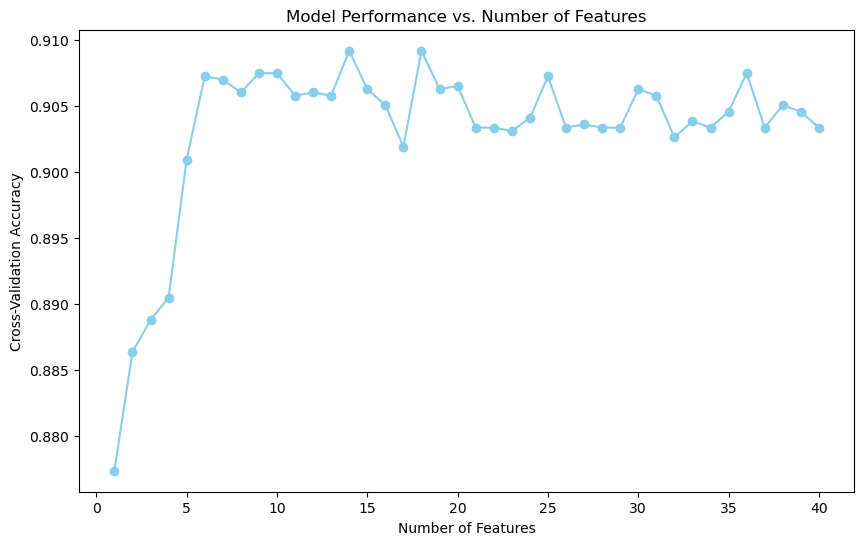

In [240]:
# from sklearn.model_selection import cross_val_score

# # Define the range of feature counts to consider
# feature_counts = range(1, len(df1.columns) + 1)

# # Store cross-validation scores for each feature count
# cv_scores = []

# for count in feature_counts:
#     top_features = feature_importance_df['Feature'][:count].tolist()
#     X_subset = df[top_features]
#     scores = cross_val_score(model, X_subset, df['y'], cv=2, scoring='accuracy')
#     cv_scores.append(scores.mean())

# # Plot cross-validation scores
# plt.figure(figsize=(10, 6))
# plt.plot(feature_counts, cv_scores, marker='o', linestyle='-', color='skyblue')
# plt.xlabel('Number of Features')
# plt.ylabel('Cross-Validation Accuracy')
# plt.title('Model Performance vs. Number of Features')
# plt.show()


# third


In [246]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
import pandas as pd

# Assuming 'df' is your Pandas DataFrame and 'target_variable' is your target column
# If not, replace them with your actual DataFrame and target column



# Use SelectKBest on the high variance data
k = 20
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(df1, df['y'])

# Get the selected features
selected_features = df1.columns[selector.get_support()].tolist()

# Get the importance scores (in this case, F-scores) of the selected features
feature_scores = selector.scores_

# Create a DataFrame with selected features and their importance scores
feature_scores_df = pd.DataFrame({'Feature': df1.columns, 'Score': feature_scores})

# Sort the DataFrame by score in descending order
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Display the selected features and their importance scores
print("Selected Features and their Importance Scores:")
print(feature_scores_df.head(k))


Selected Features and their Importance Scores:
   Feature       Score
34     x_8  874.494742
0      x_1  571.373390
8     x_18  510.047074
35    x_80  493.725495
5    x_127  362.792758
6    x_144  335.989909
21    x_57  297.960027
23    x_60  288.002435
18    x_45   79.220260
39    x_99   68.568704
31    x_73   24.186186
19    x_52   23.975513
15    x_38   22.162134
11    x_27   18.131882
10    x_25   15.061487
12    x_28    9.989708
38    x_91    9.920854
14    x_33    8.204749
30    x_71    7.455614
25    x_64    4.543984


In [247]:
third=feature_scores_df.head(k)['Feature']
third


34      x_8
0       x_1
8      x_18
35     x_80
5     x_127
6     x_144
21     x_57
23     x_60
18     x_45
39     x_99
31     x_73
19     x_52
15     x_38
11     x_27
10     x_25
12     x_28
38     x_91
14     x_33
30     x_71
25     x_64
Name: Feature, dtype: object

In [248]:
# Create a DataFrame
df_new5 = pd.DataFrame({'Variables': df1.columns})
df_new5['Mark'] = df_new['Variables'].isin(third).astype(int)

df_new5.to_csv('convolve5.csv', index=False)


# correlation analysis

In [14]:
correlation_matrix = df.corr()



In [15]:
target_correlation = correlation_matrix['y'].abs()

In [28]:
relevant_features = target_correlation.nlargest(21).index.tolist()

In [29]:
len(relevant_features)

21

In [259]:
# Create a DataFrame
df_new3 = pd.DataFrame({'Variables': df1.columns})
df_new3['Mark'] = df_new['Variables'].isin(relevant_features).astype(int)


# Entropyloss

In [1]:
from scipy.stats import entropy
import numpy as np

def calculate_entropy_loss(feature_values, target_values):
    unique_values, counts = np.unique(feature_values, return_counts=True)
    probabilities = counts / len(feature_values)
    
    entropy_before_split = entropy(np.unique(target_values, return_counts=True)[1], base=2)

    entropy_after_split = 0
    for value, prob in zip(unique_values, probabilities):
        subset_indices = feature_values == value
        entropy_after_split += prob * entropy(np.unique(target_values[subset_indices], return_counts=True)[1], base=2)

    entropy_loss = entropy_before_split - entropy_after_split
    return entropy_loss



In [23]:
# Assuming 'data' is your dataset and 'target' is the target variable
feature_entropy_loss = {}
for feature in df.columns:
    entropy_loss = calculate_entropy_loss(df[feature], df['y'])
    feature_entropy_loss[feature] = entropy_loss

# Select the top 20 features with the highest entropy loss
selected_features = sorted(feature_entropy_loss, key=feature_entropy_loss.get, reverse=True)[:21]

In [24]:
selected_features

['y',
 'x_33',
 'x_8',
 'x_77',
 'x_44',
 'x_12',
 'x_7',
 'x_83',
 'x_28',
 'x_1',
 'x_127',
 'x_144',
 'x_18',
 'x_80',
 'x_70',
 'x_59',
 'x_57',
 'x_60',
 'x_25',
 'x_124',
 'x_45']

In [30]:
common= list(set(selected_features).intersection(relevant_features))

In [31]:
len(common)

13

In [37]:
from sklearn.feature_selection import mutual_info_classif

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [40]:
# Example using LASSO regression for feature selection
lasso = LogisticRegression(penalty='l1', solver='liblinear')
lasso.fit(df1, df['y'])

# Display coefficients and selected features
lasso_coefficients = lasso.coef_[0]
selected_features_lasso = np.where(lasso_coefficients != 0)[0]
print("LASSO Selected features:", selected_features_lasso)

LASSO Selected features: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 23 25
 26 28 29 30 31 32 33 34 35 36 38 39]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [55]:
# Display coefficients and selected features in increasing order
lasso_coefficients = lasso.coef_[0]
print(lasso_coefficients)
selected_features_lasso = np.where(lasso_coefficients != 0)[0]
selected_features_lasso_sorted = np.argsort(np.abs(lasso_coefficients[selected_features_lasso]))

print("LASSO Selected features (sorted):", selected_features_lasso[selected_features_lasso_sorted])


[-9.65648374e-03  3.30197788e-02 -2.99746624e-03  1.88230226e-05
  1.65957963e-04 -1.08545146e+00  7.55816365e-01  1.56263038e-03
 -1.38349757e-03  2.35727441e-02  4.77635631e-03  4.79697371e-01
  7.24080278e-03  3.13782878e-04 -1.00991883e-02  2.76071204e-01
 -4.38087664e-03 -2.08880824e-04  6.26138377e-01 -8.47253203e-02
  0.00000000e+00  5.12040404e-01 -2.50467723e-04 -1.44854488e-01
  0.00000000e+00 -2.58684534e-01  1.50078440e-01  0.00000000e+00
 -1.52023926e-05  1.54734491e-04  1.96835250e-01 -5.47992624e-02
  1.57129146e-04 -5.70294412e-03  5.09946315e-03  1.38297634e-01
 -1.04636407e-03  0.00000000e+00  3.34863033e-01  1.94232916e-01]
LASSO Selected features (sorted): [28  3 29 32  4 17 22 13 36  8  7  2 16 10 34 33 12  0 14  9  1 31 19 35
 23 26 39 30 25 15 38 11 21 18  6  5]


In [56]:
top_20_features = selected_features_lasso_sorted[:20]

In [58]:
top_20_features

array([25,  3, 26, 29,  4, 17, 21, 13, 33,  8,  7,  2, 16, 10, 31, 30, 12,
        0, 14,  9], dtype=int64)

In [61]:
zzz= df1.columns[top_20_features]

In [70]:
common1= list(set(zzz).intersection(relevant_features))

In [71]:
common1

['x_1', 'x_64', 'x_71', 'x_57', 'x_73', 'x_18', 'x_33', 'x_28', 'x_25']

In [67]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

df1_positive = df1.abs()

# Assuming df1 is your DataFrame and 'y' is the target variable
X = df1_positive  # Features
y = df['y']  # Target variable

# Apply the chi-square test statistic for feature selection
k_best = SelectKBest(score_func=chi2, k=20)
X_new = k_best.fit_transform(X, y)

# Get the indices of the selected features
selected_features_indices = k_best.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_features_indices]

# Display the selected features
print("Selected Features using Chi-Square Test:")
print(selected_features)


Selected Features using Chi-Square Test:
Index(['x_1', 'x_12', 'x_127', 'x_144', 'x_18', 'x_25', 'x_28', 'x_33', 'x_42',
       'x_45', 'x_52', 'x_57', 'x_60', 'x_7', 'x_70', 'x_73', 'x_77', 'x_8',
       'x_80', 'x_83'],
      dtype='object')


In [68]:
common= list(set(relevant_features).intersection(selected_features))
common

['x_127',
 'x_1',
 'x_144',
 'x_80',
 'x_52',
 'x_60',
 'x_45',
 'x_8',
 'x_57',
 'x_73',
 'x_18',
 'x_33',
 'x_28',
 'x_25']

In [69]:
len(common)

14

In [83]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from mlxtend.feature_selection import SequentialFeatureSelector

# Generate a dataset with 40 features (20 relevant and 20 irrelevant)

X = df1
y =df['y']

# Use a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X, y)
# Sequential Floating Forward Selection (SFFS)
sffs = SequentialFeatureSelector(clf,
                                 k_features=20,
                                 forward=True,
                                 floating=True,
                                 scoring='accuracy',
                                 cv=5)

# Fit the SFFS to the training data
sffs.fit(X,y)

# Get the selected feature indices
selected_features_indices = np.array(sffs.k_feature_idx_)

# Get feature importances
feature_importances = clf.feature_importances_

# Rank features based on importance
ranked_features = np.argsort(feature_importances)[::-1]

# Select the top 20 relevant features
selected_features = ranked_features[:20]



print("Selected relevant features:", selected_features)



Selected relevant features: [34  0 17 14 36 10  3 21 32 22  4 29 12 28  8 35  7 16 33  5]


In [82]:
pip install mlxtend


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.4/1.4 MB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
